In [1]:
import torch

In [2]:
x = torch.arange(20*2, dtype=torch.float32).reshape(2,5,4)

In [8]:
x

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],

        [[20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.],
         [32., 33., 34., 35.],
         [36., 37., 38., 39.]]])

In [10]:
## 按照某维度来运算，对应减少维度
x.sum(axis=0) ## axis=1, axis=2
x.sum(axis=[0, 1])

tensor([180., 190., 200., 210.])

In [12]:
## 按照某维度来运算，保持维度不变
x1 = x.sum(axis=[0, 1], keepdim=True)
x1, x.shape

(tensor([[[180., 190., 200., 210.]]]), torch.Size([2, 5, 4]))

In [13]:
## 通过broadcasting实现 x/sum(x)
x/x1

tensor([[[0.0000, 0.0053, 0.0100, 0.0143],
         [0.0222, 0.0263, 0.0300, 0.0333],
         [0.0444, 0.0474, 0.0500, 0.0524],
         [0.0667, 0.0684, 0.0700, 0.0714],
         [0.0889, 0.0895, 0.0900, 0.0905]],

        [[0.1111, 0.1105, 0.1100, 0.1095],
         [0.1333, 0.1316, 0.1300, 0.1286],
         [0.1556, 0.1526, 0.1500, 0.1476],
         [0.1778, 0.1737, 0.1700, 0.1667],
         [0.2000, 0.1947, 0.1900, 0.1857]]])

In [17]:
## 累加求和
x.cumsum(axis=2)

tensor([[[  0.,   1.,   3.,   6.],
         [  4.,   9.,  15.,  22.],
         [  8.,  17.,  27.,  38.],
         [ 12.,  25.,  39.,  54.],
         [ 16.,  33.,  51.,  70.]],

        [[ 20.,  41.,  63.,  86.],
         [ 24.,  49.,  75., 102.],
         [ 28.,  57.,  87., 118.],
         [ 32.,  65.,  99., 134.],
         [ 36.,  73., 111., 150.]]])

In [23]:
## dot product (get a scale)
x = torch.ones(4, dtype=torch.float32)
y = torch.arange(4, dtype=torch.float32)
x, y , torch.dot(x, y)
torch.dot(x, y) == torch.sum(x*y)

tensor(True)

In [24]:
## torch.mv (matrix vector multiplication )
A = torch.arange(12, dtype=torch.float32).reshape(3, 4)
A.shape, x.shape, torch.mv(A, x)

(torch.Size([3, 4]), torch.Size([4]), tensor([ 6., 22., 38.]))

In [25]:
## torch.mm
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.]])

In [30]:
## norm
x = torch.tensor([3.0, -4.0])
## L2 norm
torch.norm(x)
## L1 norm
torch.abs(x).sum()
## Frobenius norm
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 15 Linear regression

In [14]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt
# from d2l import torch as d2l

1. 构造一个数据集，$y = Xw+b+\epsilon$

In [7]:
def synthetic_data(w, b, num_examples):
    """
    生成 y = Xw + b + noise
    """
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

In [8]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

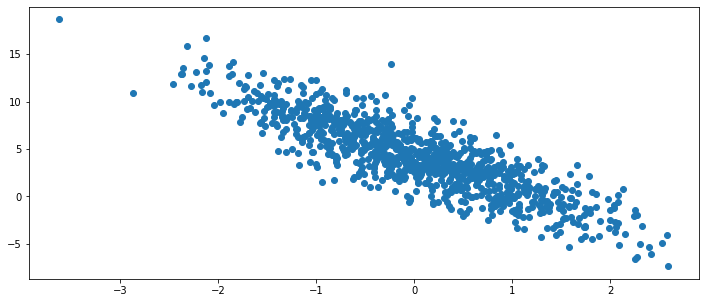

In [19]:
# d2l.set_figsize()
# d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy()) ## 先detach出来才能转成numpy

plt.figure(figsize=(12,5))
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy())
plt.show()

2. 定义data_iter函数，该函数接收批量大小、特征矩阵、标签向量作为输入，生成大小为batch_size的小批量

In [29]:
def data_iter(batch_size, features, labels):
    n = len(features) #features.shape[0]
    indices = list(range(n))
    random.shuffle(indices)
    
    for i in range(0, n, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, n)])
        yield features[batch_indices], labels[batch_indices]
## yield returns a generator instead of a function
# >>> def create_generator():
# ...    mylist = range(3)
# ...    for i in mylist:
# ...        yield i*i
# ...
# >>> mygenerator = create_generator() # create a generator
# >>> print(mygenerator) # mygenerator is an object!
# <generator object create_generator at 0xb7555c34>
# >>> for i in mygenerator:
# ...     print(i)

In [31]:
batch_size = 10
batch_generator = data_iter(batch_size, features, labels)
# for X, y in batch_generator:
#     print(X, '\n', y)
#     break

3. 定义初始化模型参数

In [32]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

4. 定义模型

In [33]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

5. 定义loss function

In [34]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

6. 定义优化算法

In [ ]:
def sgd(params, lr, batch_size): ## lr: learning rate
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= ir * param.grad / batch_size
            param.grad.zero_() ## 梯度置0

7. 训练模型

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = square_loss

for epoch in

In [23]:
import time
import datetime

In [26]:
a = '2023-01-01'
b = '2023-01-02'

a==b

False

In [21]:
a1 = datetime.datetime.strptime(a.split(' ')[0], "%Y-%m-%d")    # 将字符串a转化为datetime，用的是strptime

In [35]:
a = datetime.date.today().strftime("%Y-%m-%d")

In [36]:
a

'2023-01-11'

In [5]:
b = time.mktime(time.strptime(a, '%Y-%m-%d %H:%M'))
b

1701388860.0

In [12]:
time_local = time.localtime(b-1)
time.strftime("%Y-%m-%d", time.localtime(b-1))

'2023-12-01 08:00:59'

In [8]:

dt = "2016-05-05 20:28:54"

#转换成时间数组
timeArray = time.strptime(dt, "%Y-%m-%d %H:%M:%S")
#转换成时间戳
timestamp = time.mktime(timeArray)

In [10]:
timeArray

time.struct_time(tm_year=2016, tm_mon=5, tm_mday=5, tm_hour=20, tm_min=28, tm_sec=54, tm_wday=3, tm_yday=126, tm_isdst=-1)